<a href="https://colab.research.google.com/github/Suat-Kaya/nlp/blob/Week-3-Assignment/Suat_Kaya_4000357656_Week_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') # Download the stopwords dataset (necessary in Colab)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

The Data I selected is from kaggle.com and it is **Amazon Product Reviews Dataset**

**Here's a summary of the dataset:**

Number of Records: The dataset contains 1,597 records.

Review Examples:

0. "I initially had trouble deciding between the Paperwhite and Voyage..."
1. "Allow me to preface this with a little history, as a casual reader..."
2. "I am enjoying it so far. Great for reading..."
3. "I bought one of the first Paperwhites and have been pleased..."
4. "I have to say upfront - I don't like corporate policies..."


**Breakdown of Positive/Negative Examples:**

Positive Reviews (ratings 4 or above): 977.
Negative Reviews (ratings below 4): 200.


In [ ]:
file_path = '7817_1.csv' # Load dataset
reviews_df = pd.read_csv(file_path)
reviews_df.head() # Checking the data

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [ ]:
# Assuming ratings of 4 and above are positive, and below 4 are negative
positive_reviews = reviews_df[reviews_df['reviews.rating'] >= 4].shape[0]
negative_reviews = reviews_df[reviews_df['reviews.rating'] < 4].shape[0]

print(f"Number of positive reviews: {positive_reviews}")
print(f"Number of negative reviews: {negative_reviews}")


Number of positive reviews: 977
Number of negative reviews: 200


In [ ]:
reviews_text = reviews_df['reviews.text'].dropna()  # Extract the reviews.text column
reviews_text.head()

,reviews.text
0,I initially had trouble deciding between the p...
1,Allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...
3,I bought one of the first Paperwhites and have...
4,I have to say upfront - I don't like coroporat...


In [ ]:
# text cleaning function
def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

In [ ]:
reviews_cleaned = reviews_text.apply(clean_text) # Apply the cleaning function to the reviews

print(reviews_cleaned.head()) #Display a few cleaned reviews to verify

0    initially trouble deciding paperwhite voyage r...
1    allow preface little history casual reader own...
2    enjoying far great reading original fire since...
3    bought one first paperwhites pleased constant ...
4    say upfront dont like coroporate hermetically ...
Name: reviews.text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Import TF-IDF vectorizer from sklearn
import numpy as np

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Initialized the TF-IDF Vectorizer with ngram_range (unigrams + bigrams)

X = tfidf_vectorizer.fit_transform(reviews_cleaned) #Applied TF-IDF to the cleaned reviews

# Getting feature names and convert to DataFrame for TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Displaying the first 15 rows of the TF-IDF matrix (words as columns)
tfidf_scores = tfidf_df.iloc[0:15]
print(tfidf_scores)

     10  100  100 headphones  100 would  1080p  1080p 1920x1080  \
0   0.0  0.0             0.0        0.0    0.0              0.0   
1   0.0  0.0             0.0        0.0    0.0              0.0   
2   0.0  0.0             0.0        0.0    0.0              0.0   
3   0.0  0.0             0.0        0.0    0.0              0.0   
4   0.0  0.0             0.0        0.0    0.0              0.0   
5   0.0  0.0             0.0        0.0    0.0              0.0   
6   0.0  0.0             0.0        0.0    0.0              0.0   
7   0.0  0.0             0.0        0.0    0.0              0.0   
8   0.0  0.0             0.0        0.0    0.0              0.0   
9   0.0  0.0             0.0        0.0    0.0              0.0   
10  0.0  0.0             0.0        0.0    0.0              0.0   
11  0.0  0.0             0.0        0.0    0.0              0.0   
12  0.0  0.0             0.0        0.0    0.0              0.0   
13  0.0  0.0             0.0        0.0    0.0              0.

In [ ]:
# Displaying detailed TF-IDF scores for a specific document (review)
document_index = 0

# Getting the non-zero indices and their corresponding scores for the selected document
non_zero_indices = X[document_index].nonzero()[1]
tfidf_scores_for_doc = zip(non_zero_indices, [X[document_index, x] for x in non_zero_indices])

# Creating a DataFrame to display the words and their associated TF-IDF scores
tfidf_scores_df = pd.DataFrame(
    [(feature_names[i], score) for (i, score) in tfidf_scores_for_doc],
    columns=["Word", "TF-IDF Score"]
).sort_values(by="TF-IDF Score", ascending=False)

# Display the TF-IDF scores for the chosen document
print("TF-IDF scores for document index", document_index)
print(tfidf_scores_df)

TF-IDF scores for document index 0
          Word  TF-IDF Score
33     setting      0.348362
3   paperwhite      0.306543
73    time day      0.249799
36       light      0.238086
57    shipping      0.207123
..         ...           ...
41        easy      0.050060
34        dont      0.046470
42         use      0.041079
9        great      0.039823
59      amazon      0.037256

[75 rows x 2 columns]


In [ ]:
'''
I don't have a Sentiment column in my dataset. Instead, I have a reviews.rating column, which gives a numeric rating (1 to 5) for the product.
In my case:
ratings 1 and 2 can be considered negative sentiment (dissatisfied customers).
ratings 4 and 5 can be considered positive sentiment (satisfied customers).
rating 3 can be considered neutral, or I can ignore it for binary sentiment analysis.
'''
y = reviews_df['reviews.rating'].apply(lambda x: 1 if x >= 4 else 0 if x <= 2 else None) # Created binary sentiment labels from ratings

# Droped rows with neutral rating (3)
X = X[y.notnull()]
y = y.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initializing and training the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logreg.fit(X_train, y_train)

# Makeing predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluateing the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# =Printing the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.94
Precision: 0.94
Recall: 1.00
F1-Score: 0.97


In [ ]:
# Evan though the metrix are very good, I want to try SVm and GXBoost
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Step 1: Splitting the data into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize and train the SVM model
svm_model = SVC(kernel='linear')  # Using a linear kernel
svm_model.fit(X_train, y_train)

# Step 3: Make predictions using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Step 4: Evaluate SVM model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Step 5: Print SVM evaluation metrics
print("SVM Model Performance:")
print(f'Accuracy: {accuracy_svm:.2f}')
print(f'Precision: {precision_svm:.2f}')
print(f'Recall: {recall_svm:.2f}')
print(f'F1-Score: {f1_svm:.2f}')

SVM Model Performance:
Accuracy: 0.95
Precision: 0.95
Recall: 1.00
F1-Score: 0.98


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Step 1: Splitting the data into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Step 3: Make predictions using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Step 4: Evaluate XGBoost model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Step 5: Print XGBoost evaluation metrics
print("XGBoost Model Performance:")
print(f'Accuracy: {accuracy_xgb:.2f}')
print(f'Precision: {precision_xgb:.2f}')
print(f'Recall: {recall_xgb:.2f}')
print(f'F1-Score: {f1_xgb:.2f}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:06:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Performance:
Accuracy: 0.92
Precision: 0.95
Recall: 0.97
F1-Score: 0.96


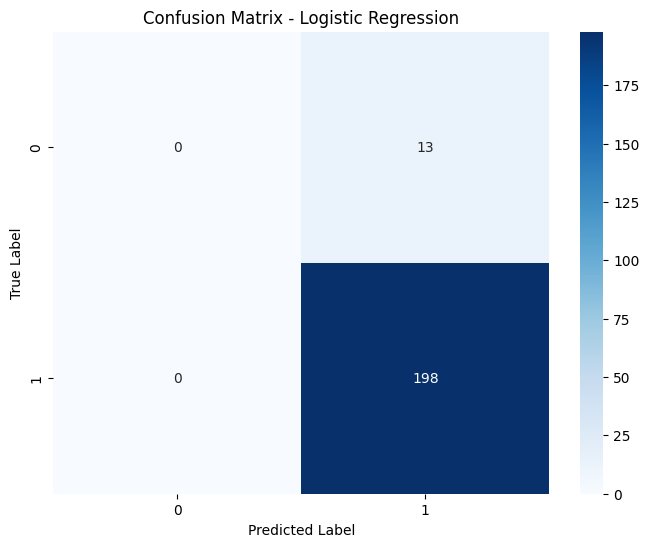

In [ ]:
#Now, I am adding confusion Matrix for each model

# Logistic Regression Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generating and plotting the confusion matrix for the Logistic Regression model
conf_matrix_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

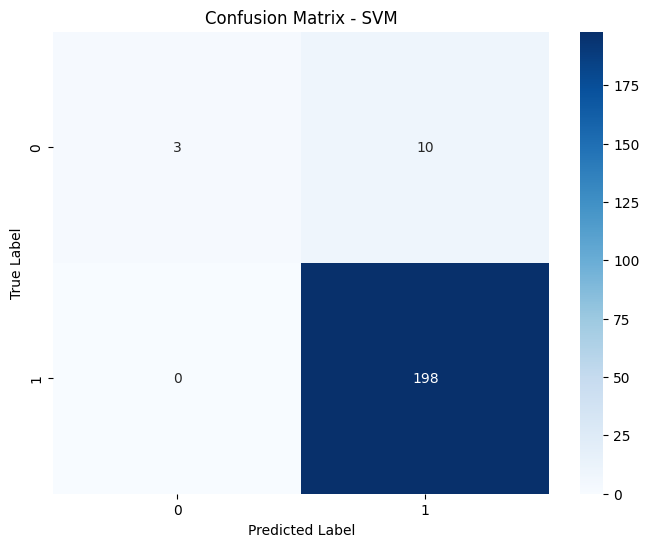

In [ ]:
# Confusion Matrix for SVM

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

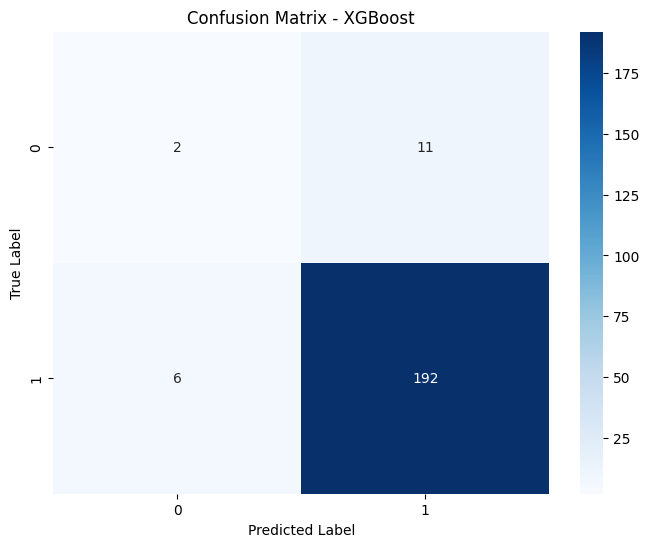

In [ ]:
# Confusion Matrix for XGBoost:

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
